# Chutes & Ladders

This is a fun evening exploration to teach myself how to code
Python by asking the question "What does the distribution of
games of Chutes & Ladders look like by number of spins to win?"

If you're new to Jupyter or Python you might find this interesting.

There's quite a long tail distribution - if you get very unlucky,
the game might last well over 200 spins, but if you're super lucky
you could get it in 7. :)

- David E. Weekly <david@weekly.org>

In [11]:
# We'll be lazy and code both chutes and ladders as "portals",
# first specifying the square FROM which the portal will go and
# then the square TO which the portal will take you. This allows
# both forward and backward movement. This set of coded portals
# maps the Chutes & Ladders game.

portals = {
        1  : 38,
        4  : 14,
        9  : 31,
        16 : 6,
        21 : 42,
        28 : 84,
        36 : 44,
        47 : 26,
        49 : 11,
        56 : 53,
        51 : 67,
        62 : 19,
        64 : 60,
        71 : 91,
        80 : 100,
        87 : 24,
        93 : 73,
        96 : 75,
        98 : 78,
}

# Check if current square has a portal; return destination
# square if it does, False otherwise.
def portalToWhere(fromSquare):
    if fromSquare in portals: return portals[fromSquare]
    return False

# Plays a game of Chutes & Ladders, returns # spins to win
# If printGame is true, will print details of the game.
import random
def playGame(printGame):
    pos = 0
    spins = 0
    while True:
        spin = random.randint(1,6)
        spins = spins + 1
        if printGame: print ("you spun a ", spin)
        if (pos + spin > 100):
            if printGame: print ("oh no,  you can't go past 100")
        else:
            pos += spin
            if printGame: print ("after roll you landed on ", pos)
        portalDest = portalToWhere(pos)
        if(portalDest):
            if(portalDest < pos):
                if printGame: print("oh no, a chute to",portalDest)
            if(portalDest > pos):
                if printGame: print("oh yay, a ladder to",portalDest)
            pos = portalDest
        if(pos == 100):
            break
    if printGame: print ("you won in ",spins,"spins!")
    return spins

# Now we're going to play a whole bunch of games to get a distribution.
print("Playing games...")
gameOutcomes = []
for game in range(100000):
    gameOutcomes.append(playGame(False))
print("100,000 games completed.")

Playing games...
100,000 games completed.


In [12]:
print("Fastest game is in",min(gameOutcomes),"spins.")
print("Slowest game is in",max(gameOutcomes),"spins.")

Fastest game is in 7 spins.
Slowest game is in 278 spins.


Median game takes 32 spins.
95th %ile game takes 89 spins.


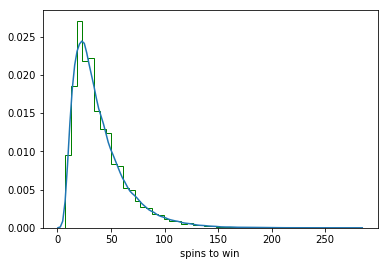

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

print("Median game takes",  int(np.median(gameOutcomes)),          "spins.")
print("95th %ile game takes", int(np.percentile(gameOutcomes, 95)),"spins.")
sns.distplot(gameOutcomes, axlabel="spins to win", hist_kws={"histtype":"step", "alpha":1, "color":"g" })